## 0.0 Importando Bibliotecas

In [202]:
import math
import numpy as np
import pandas as pd
import inflection
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.2 Carregando Dados

In [203]:
df_sales_raw = pd.read_csv('Base de Dados\TRAIN.csv', low_memory=False)
df_store_raw = pd.read_csv('Base de Dados\STORE.csv', low_memory=False)

# Realizando a unificação das duas tabelas em uma, usando como referencia a coluna store
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

## 1.0 Descrição dos Dados

In [204]:
df1 = df_raw.copy()

## 1.1 Renomeando Colunas

In [205]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open','Promo', 'StateHoliday', 'SchoolHoliday',
'StoreType', 'Assortment', 'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

# A função inflection.underscore() é usada para converter a string de entrada em um formato de 
# texto conhecido como "snake_case". Em "snake_case", todas as letras são em minúsculas e as 
# palavras são separadas por um único caractere de sublinhado (_).
snakecase = lambda x: inflection.underscore( x )

# Em termos mais simples, a linha de código percorre cada elemento da lista cols_old, aplica a 
# função snakecase a cada elemento e cria uma nova lista com os resultados dessas transformações. 
# Essa nova lista é atribuída à variável cols_new.
cols_new = list( map( snakecase, cols_old ) )

df1.columns = cols_new

## 1.2 Dimensão dos Dados

In [206]:
# boa prática sempre analisar quantas colunas e linhas a base tem
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Tipos de Dados

In [207]:
# boa prática, analisar as colunas e o tipo de dados que ela possui e em caso de datas, já alterar para datetime
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Checando N/A

In [208]:
# Sempre é necessário verificar se a base de dados possui informações N/A
# formas de lidar com N/A's
# 1 - excluir as entradas que tem n/a
# 2 -  algoritimos de ML que completa os vazios de acordo com os dados da coluna
# 3 - Metodo que será aplicado abaixo

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Preenchendo N/A

In [209]:
# A DECISÃO DE COMO VAMOS TRATAR OS N/A DEPENDE MUITO DO TIPO DE DADO ANALISADO E QUAL A FUNÇÃO DOS DADOS ALI
# APRESENTADOS. CADA CASO É UM CASO

# Competition_Distance
# Conceito aqui é preencher os campos faltantes com o maior número possível
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# competition_open_since_month
# Estamos prezumindo que como existe o dado de distancia do competidor, que não podemos deixar esse dado vazio
# então iremos atribuir no N/A a informação ao mês da coluna date
# esse conceito pode e deve ser revisado após a primeira iteração de análise dos dados
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month 
                                                if math.isnan( x['competition_open_since_month'] ) 
                                                else x['competition_open_since_month'], axis=1 )

# competition_open_since_year 
# Estamos prezumindo que como existe o dado de distancia do competidor, que não podemos deixar esse dado vazio
# então iremos atribuir no N/A a informação ao ano da coluna date
# esse conceito pode e deve ser revisado após a primeira iteração de análise dos dados
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year 
                                               if math.isnan( x['competition_open_since_year'] ) 
                                               else x['competition_open_since_year'], axis=1 )

# promo2_since_week
# então iremos atribuir no N/A a informação a semana da coluna date
# esse conceito pode e deve ser revisado após a primeira iteração de análise dos dados
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week 
                                               if math.isnan( x['promo2_since_week'] ) 
                                               else x['promo2_since_week'], axis=1 )

# promo2_since_year
# então iremos atribuir no N/A a informação do ano da coluna date
# esse conceito pode e deve ser revisado após a primeira iteração de análise dos dados
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year 
                                               if math.isnan( x['promo2_since_year'] ) 
                                               else x['promo2_since_year'], axis=1 )

# promo_interval 
# iremos preencher os dados N/A com 0
# criaremos um dicionário acessório para ter o nome dos meses em portugues
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
            10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Preencher promo_interval n/a com 0
df1['promo_interval'].fillna(0, inplace=True )

#criando uma coluna no df1 pegando os dados da coluna mes e subistituindo pelos dados do month_map
df1['month_map'] = df1['date'].dt.month.map( month_map )

# A condição verifica se o valor de 'promo_interval' é igual a 0. 
# Se for igual a 0, a função retorna 0, indicando que não há promoção naquele mês.
# Caso contrário, se o valor de 'promo_interval' for diferente de 0, a condição verifica se o valor de 
# 'month_map' está contido na lista de intervalos de promoção. Para isso, o valor de 'promo_interval' 
# é dividido em uma lista de intervalos separados por vírgula usando o método split(','). 
# Se 'month_map' estiver contido nessa lista, a função retorna 1, indicando que há uma promoção naquele mês. 
# Caso contrário, a função retorna 0.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if 
                                                             x['promo_interval'] == 0 else 1 if x['month_map'] 
                                                             in x['promo_interval'].split( ',' ) else 0, axis=1 )

## 1.6 Mudando Tipos de Dados

In [210]:
# Boa Prática anaisar os tipos de dados novamente, após o fill N/A

# competiton para int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( np.int64)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( np.int64 )

# promo2 para int
df1['promo2_since_week'] = df1['promo2_since_week'].astype( np.int64 )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( np.int64 )

## 1.7 Estatistica Descritiva

In [211]:
# Criando os arrays para serem analisados, puxando os dados de int e float em num_attributes e strigs em cat_attributes
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'] )

## 1.7.1 Atributos Numéricos -  num_attributes

In [212]:
# Métricas de Tendência Central - Média, Mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Métricas de dispersion - std, min, max, range, skew, kurtosis

# skew ou Skewness (assimetria) mede o grau de assimetria ou falta de simetria na distribuição dos dados. 
# Uma skewness igual a 0 indica uma distribuição perfeitamente simétrica, enquanto valores positivos indicam 
# uma assimetria à direita (cauda mais longa à direita) e valores negativos indicam uma assimetria à esquerda 
# (cauda mais longa à esquerda).

# Kurtosis (curtose) mede o grau de achatamento ou afilamento das caudas de uma distribuição em relação à 
# distribuição normal (distribuição de Gauss). Uma distribuição normal tem uma kurtosis igual a 0. 
# Uma kurtosis maior que 0 indica caudas mais pesadas (distribuição mais concentrada no centro), 
# enquanto uma kurtosis menor que 0 indica caudas mais leves (distribuição mais dispersa). Uma kurtosis positiva 
# (maior que 0) é chamada de leptocúrtica e indica uma distribuição com caudas mais pesadas e picos mais altos. 
# Uma kurtosis negativa (menor que 0) é chamada de platicúrtica e indica uma distribuição com caudas mais leves e 
# picos mais baixos.
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## 1.7.2 Atributos Categóricos - cat_attributes


<AxesSubplot:xlabel='assortment', ylabel='sales'>

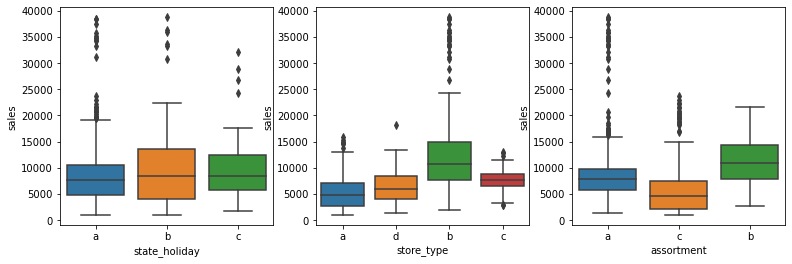

In [213]:
# Contando quantos atributos unicos cat_attributes possui
cat_attributes.apply( lambda x: x.unique().shape[0] )
# state_holiday      4
# store_type         4
# assortment         3
# promo_interval     4
# month_map         12

# Criando agrupamento aux que tem os states holyday diferente de zero e sales maiores que zero
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

# Dimensionamento dos gráficos
plt.figure(figsize=(13, 4))

#Posicionamento do gráfico acima
plt.subplot( 1, 3, 1 )

# Gráfico boxplot de vendas por feriado
sns.boxplot( x='state_holiday', y='sales', data=aux )
#Posicionamento do gráfico acima
plt.subplot( 1, 3, 2 )

# Gráfico boxplot de vendas por tipo de loja
sns.boxplot( x='store_type', y='sales', data=aux )
#Posicionamento do gráfico acima
plt.subplot( 1, 3, 3 )

# Gráfico boxplot de vendas por de sotimento das lojas
sns.boxplot( x='assortment', y='sales', data=aux )

## 2.0.Feature Engeneering

In [214]:
# Copia de Segurança 
df2 = df1.copy()

In [215]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime (year=x ['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )

# # promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else'extra' if x == 'b' else 'extended' )

# assortment
df2['assortment'] = df2['assortment'].replace({'a': 'basic', 'b': 'extra', 'c': 'extended'})

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


## 2.2. Criacao das Hipoteses



### 2.2.1. Hipoteses Loja

In [217]:
# 1. Lojas com número maior de funcionários deveriam vender mais.
# 2. Lojas com maior capacidade de estoque deveriam vender mais.
# 3. Lojas com maior porte deveriam vender mais.
# 4. Lojas com maior sortimentos deveriam vender mais.
# 5. Lojas com competidores mais próximos deveriam vender menos.
# 6. Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2. Hipoteses Produto


In [218]:
# 1. Lojas que investem mais em Marketing deveriam vender mais.
# 2. Lojas com maior exposição de produto deveriam vender mais.
# 3. Lojas com produtos com preço menor deveriam vender mais.
# 5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
# 6. Lojas com promoções ativas por mais tempo deveriam vender mais.
# 7. Lojas com mais dias de promoção deveriam vender mais.
# 8. Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipoteses Tempo

In [219]:
# 1. Lojas abertas durante o feriado de Natal deveriam vender mais.
# 2. Lojas deveriam vender mais ao longo dos anos.
# 3. Lojas deveriam vender mais no segundo semestre do ano.
# 4. Lojas deveriam vender mais depois do dia 10 de cada mês.
# 5. Lojas deveriam vender menos aos finais de semana.
# 6. Lojas deveriam vender menos durante os feriados escolares.

## 3.0 Filtragem de Variáveis

In [221]:
# Copia de Segurança 
df3 = df2.copy()

### 3.1 Filtragem das Linhas

In [222]:
# Serve para reduzirmos quais colunas iremos usar e como iremos usar na análise solicitada
# A filtragem depende do que está se procurando na base de dados 
# aqui filtrando somente o que é open diferente de zero e sales maior que zero
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2 Seleção das Colunas

In [223]:
# Estraíndo colunas que não são úteis para essa análise
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

## 4.0 Análise Exploratória

### Análise Exploratória de dados ou EDA tem como objetivo observarmos como as variáveis impacam o fenomeno 

### Observável Objetivos da EDA:
##### 1 - Ganhar Experiência do Negócio
##### 2 - validar hipóteses de Negócio (Insights)
##### 3 - Perceber Variáveis que são importantes para o modelo

### Tipos de Análise
#### Análise Univariada
Como é essa Variável?
(min, max, distribuição, range)

#### Análise Bivariada
Como a variável impacta a resposta?
(correlação, validação das hipóteses)

### Análise Multivariada
Como as variáveis se relacionam?
(correlação entre elas)

In [224]:
# Copia de Segurança 
df4 = df3.copy()

### 4.1 Análise Univariada

#### 4.1.1 Response Variable

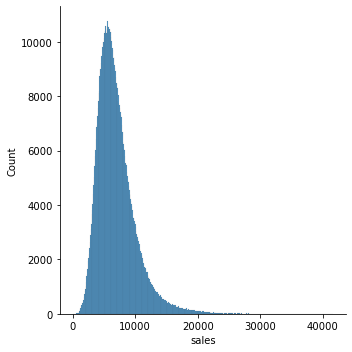

In [225]:
# vendo ditribuição das vendas 
sns.displot( df4['sales'], kde=False )

#### 4.1.2 Numerical Variable

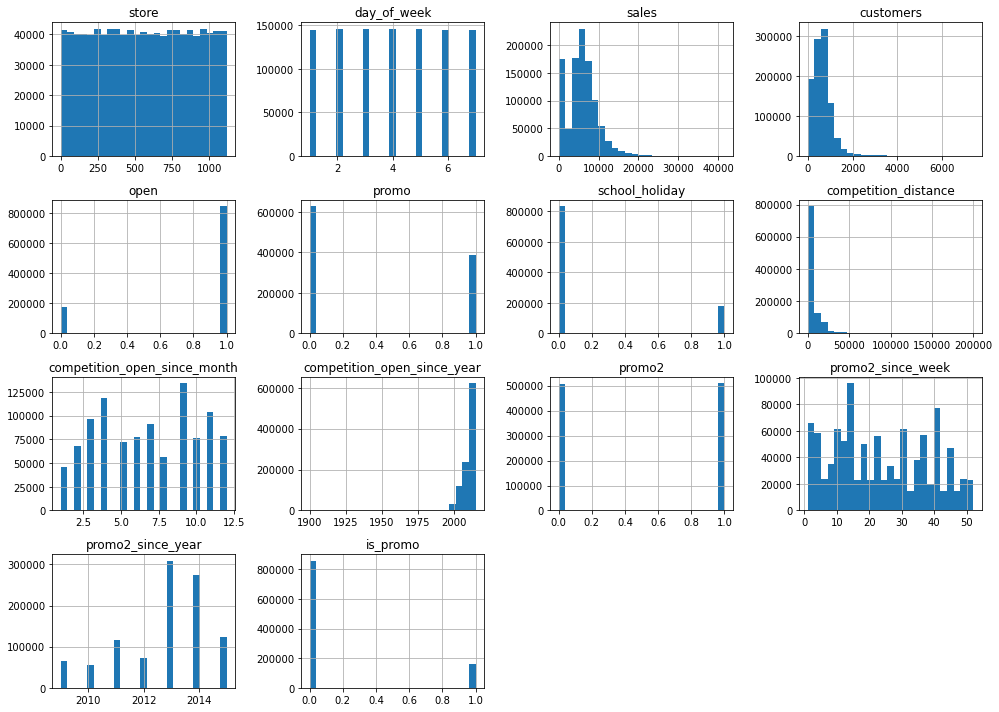

In [226]:
# Apresentando todos os dados numéricos do conjunto de dados
num_attributes.hist(bins=25, figsize=(14, 10))

# Ajusta o espaçamento para não truncarem
plt.tight_layout()

#### 4.1.3 Categorical Variable

In [227]:
# criação de cenário: volume de vendas por tipo de dia, tipo de loja e tipo de assortments
# tirando entrada duplicadas do state holiday
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Carlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will b

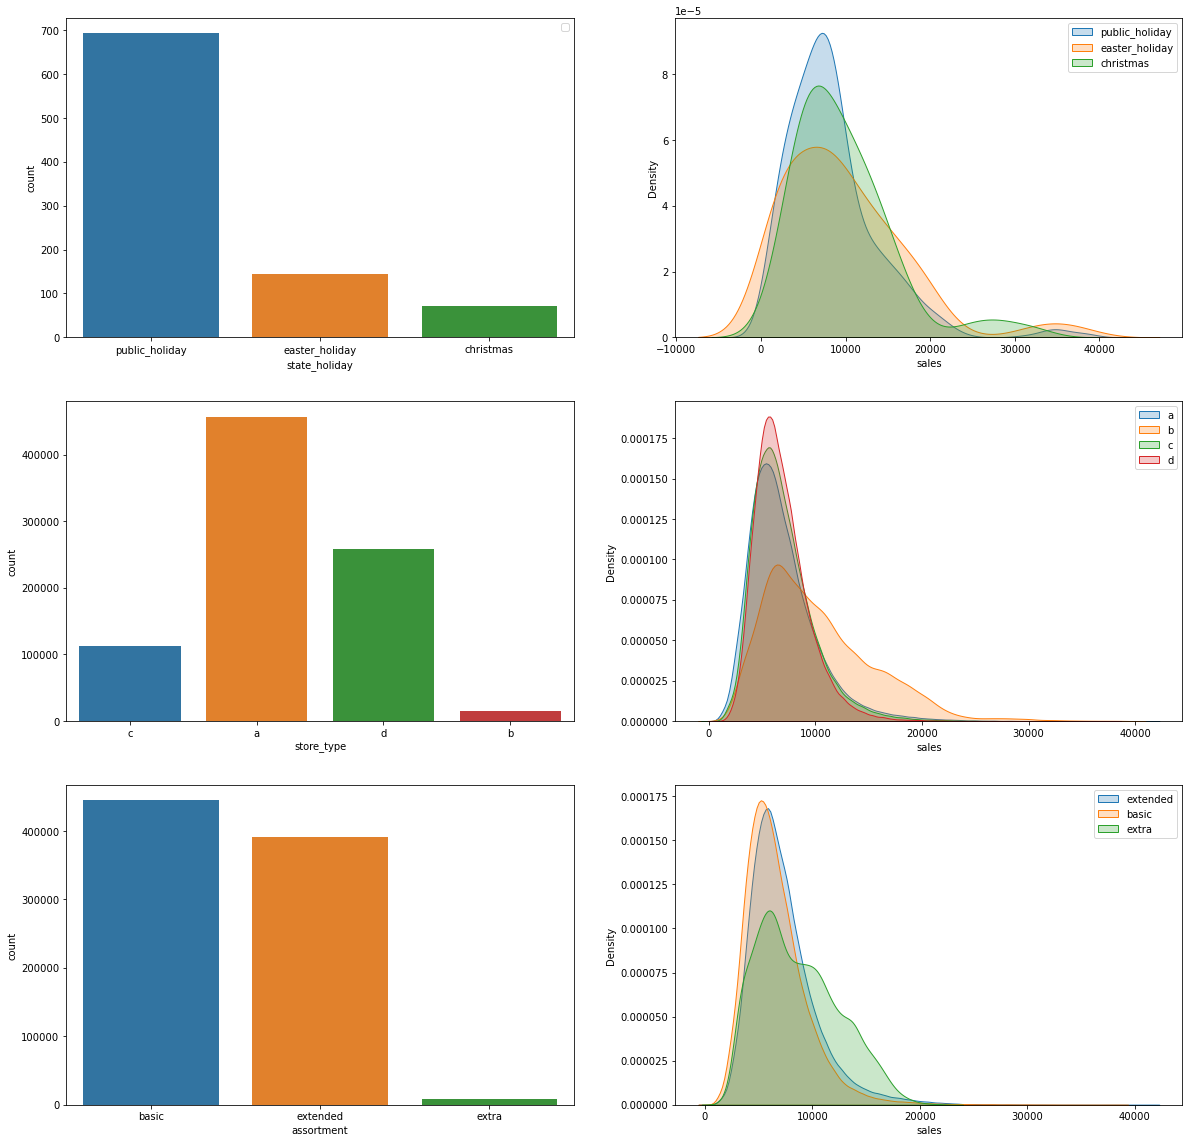

In [228]:
plt.figure(figsize=(20, 20))

plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )
plt.legend()

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True )
plt.legend()

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'] )
plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )
plt.legend()

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'] )
plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True )
plt.legend()

### 4.2 Análise Bivariada

#### H1. Lojas com maior sortimentos deveriam vender mais

<Figure size 1440x1440 with 0 Axes>

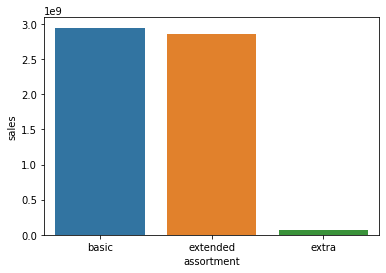

<Figure size 1440x1440 with 0 Axes>

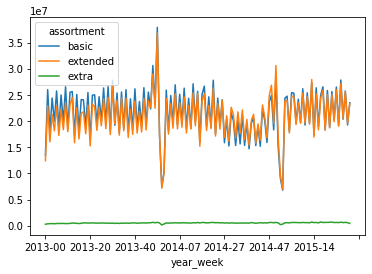

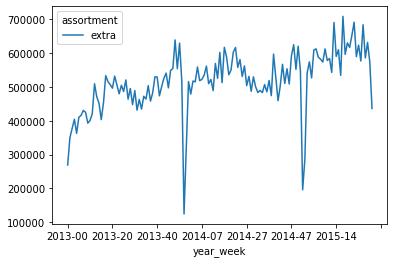

<Figure size 1440x1440 with 0 Axes>

In [237]:
# Agrupando os dados de assortment e vendas, por assortment
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

plt.figure(figsize=(20, 20))
# Agrupando 'year_week', 'assortment', 'sales' por 'year_week','assortment' mas 
# pivotando a informação year_week para o eixo y e os assortments no eixo x por valor de vendas
aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

# RESPOSTA: LOJAS COM MENOR SORTIMENTO NÃO VENDEM MAIS, NA VERDADE, VENDEM MENOS 

#### H2. Lojas com competidores mais próximos deveriam vender menos.

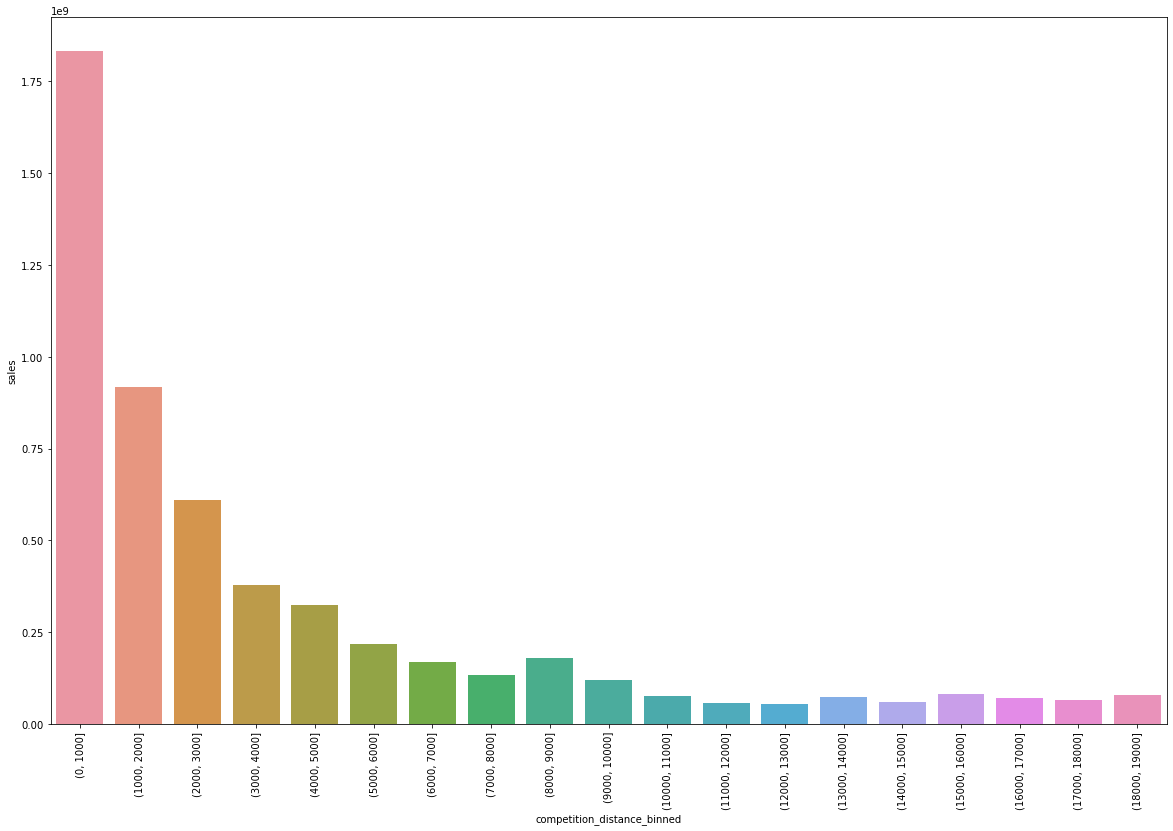

In [257]:
plt.figure(figsize=(20, 13))
# Agrupando os dados de competition_distance e vendas, por competition_distance
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
# Criando agrupamento de ranges para facilitar a visualização no gráfico
bins = list( np.arange( 0, 20000, 1000) )
# juntando o grupo de distancias e colocando em uma coluna competition_distance_binned
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'],bins=bins )
# Agrupando os dados de competition_distance_binned e vendas, por competition_distance_binned
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned' ).sum().reset_index()
# Trazendo o gráfico 
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 )
plt.xticks(rotation=90);

# RESPOSTA: NA VERDADE LOJAS COM COMPETIDORES MAIS PRÓXIMOS VENDEM MAIS

#### H3. Lojas com competidores à mais tempo deveriam vendem mais.

In [270]:
# FAZER!!

#### H4. Lojas com promoções ativas por mais tempo deveriam vender mais

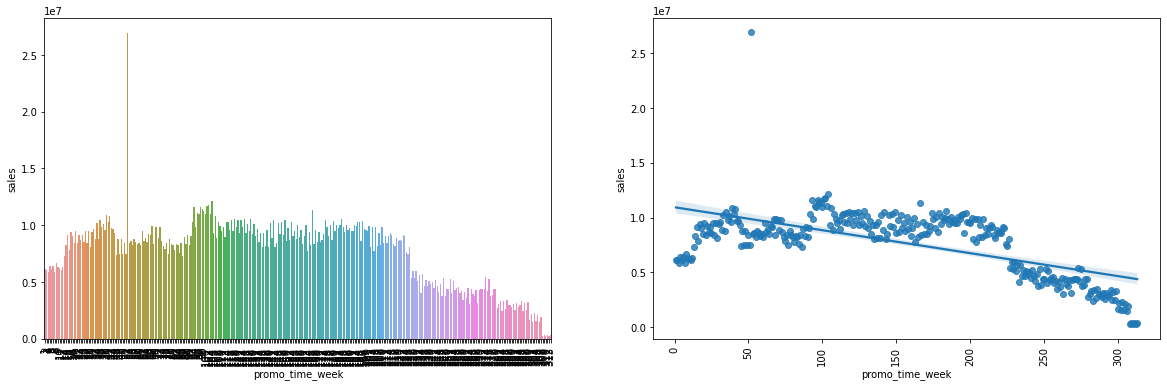

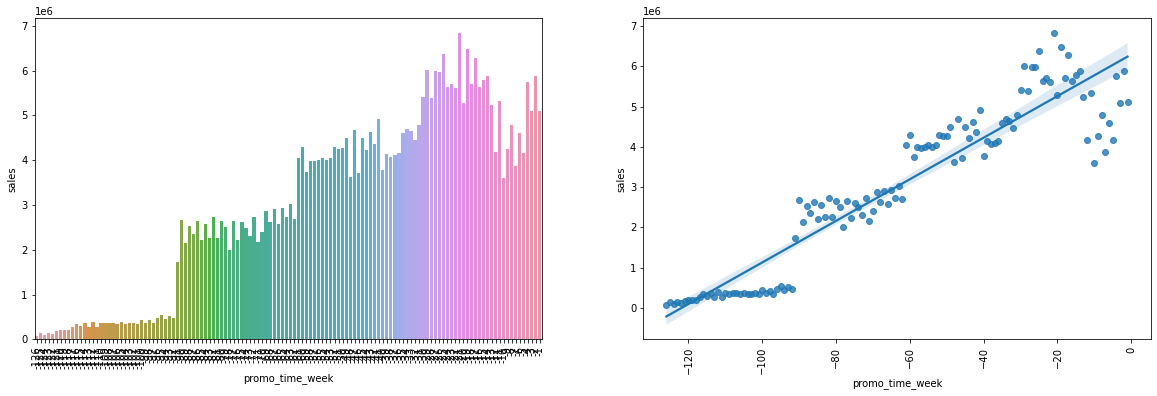

In [283]:
aux1 = df4[['promo_time_week', 'sales']].groupby( 'promo_time_week').sum().reset_index()

# Aqui ele mostra os dados de venda das promoções, começando pelas promoções extendidas. Depois de um tempo
# a promoção não se sustenta a longo prazo
plt.figure(figsize=(20, 13))
plt.subplot(2,2,1)
aux2 = aux1[aux1['promo_time_week'] > 0]
sns.barplot(x ='promo_time_week', y='sales', data=aux2)
plt.xticks(rotation=90);

# Regressão Linear acima
plt.subplot(2,2,2)
sns.regplot(x ='promo_time_week', y='sales', data=aux2)
plt.xticks(rotation=90);

# Aqui ele mostra os dados de venda das promoções, começando pelas promoções normais
# aqui ele mostra sim que há um movimento de aumento no início das promoções
plt.figure(figsize=(20, 13))
plt.subplot(2,2,3)
aux3 = aux1[aux1['promo_time_week'] < 0]
sns.barplot(x ='promo_time_week', y='sales', data=aux3);
plt.xticks(rotation=90);

# Regressão Linear acima
plt.subplot(2,2,4)
sns.regplot(x ='promo_time_week', y='sales', data=aux3)
plt.xticks(rotation=90);

# RESPOSTA: NA VERDADE LOJAS COM PROMOÇÕES ATIVAS POR MAIS TEMPO, VENDEM MENOS

#### H5. Lojas com mais dias de promoção deveriam vender mais.

In [ ]:
# DEPOIS

#### H7. Lojas com mais promoções consecutivas deveriam vender mais.

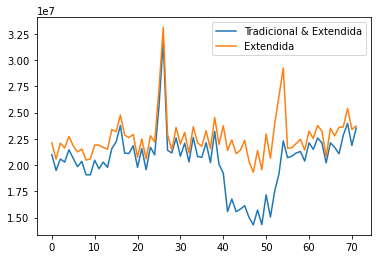

In [287]:
# Promo é a promoção normal e promo2 são as promoções extendidas
df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index().sort_values('sales', ascending=True)

# Vendas no tempo das lojas com promoção tradicional e tradicional mais extendida
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()
aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )
ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

# RESPOSTA: LOJAS COM PROMOÇÕES CONSECUTIVAS VENDEM MENOS

#### H8. Lojas abertas durante o feriado de Natal deveriam vender mais.

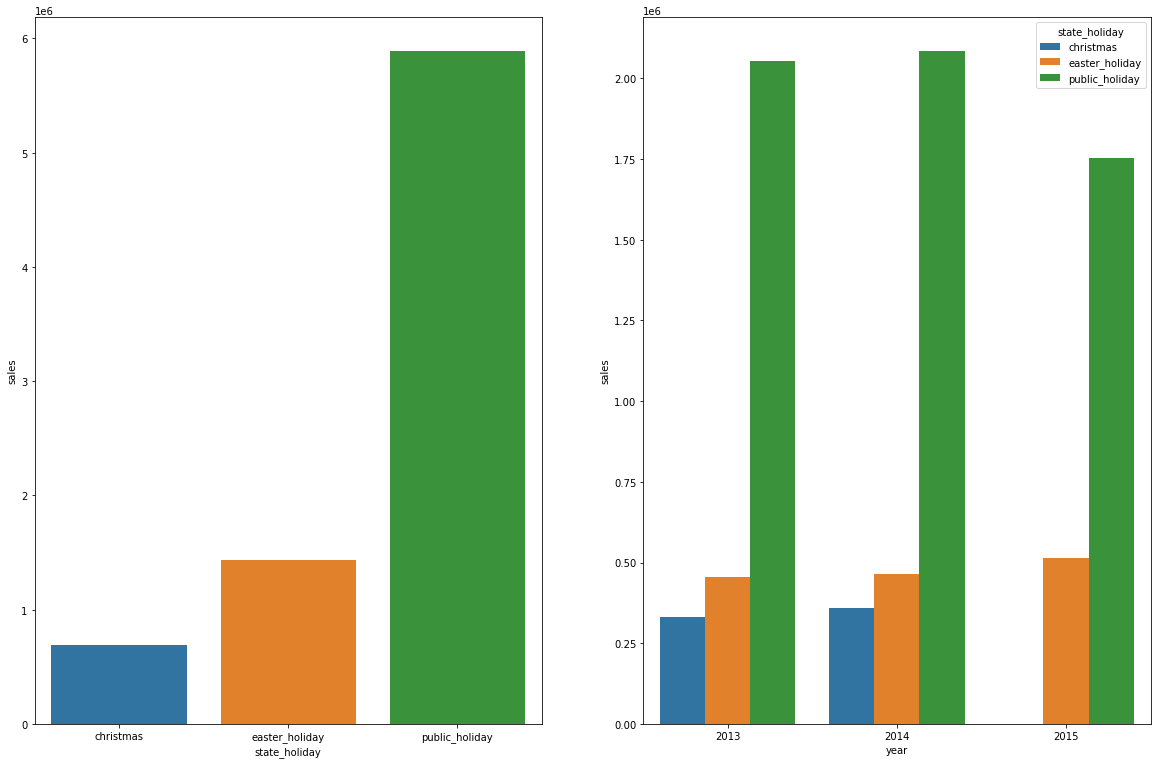

In [289]:
# comparar demais volumes de vendas, retirando regular day
aux = df4[df4['state_holiday'] != 'regular_day']
plt.figure(figsize=(20, 13))

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()

sns.barplot( x='state_holiday', y='sales', data=aux1 );
plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year','state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

# RESPOSTA: FERIADO DO NATAL É O QUE VENDE MENOS

#### H9. Lojas deveriam vender mais ao longo dos anos.

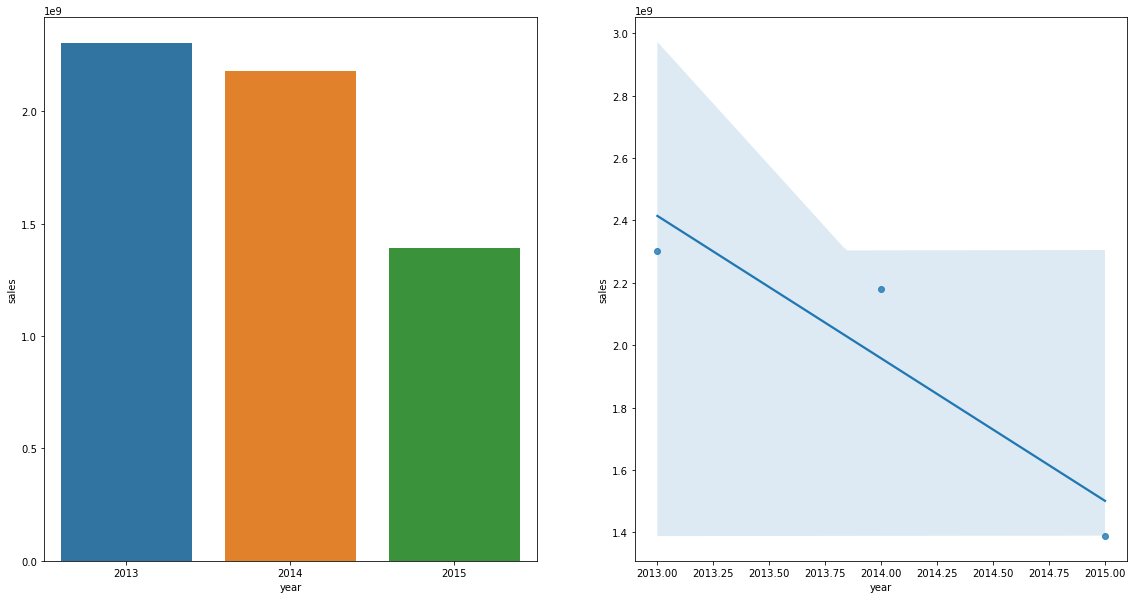

In [300]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index()
plt.figure(figsize=(30, 10))
plt.subplot( 1, 3, 1 )
sns.barplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='year', y='sales', data=aux1 );

# REPOSTA: AS LOJAS VENDEM MENOS NO DECORRER DOS ANOS 

#### H10. Lojas deveriam vender mais no segundo semestre do ano.

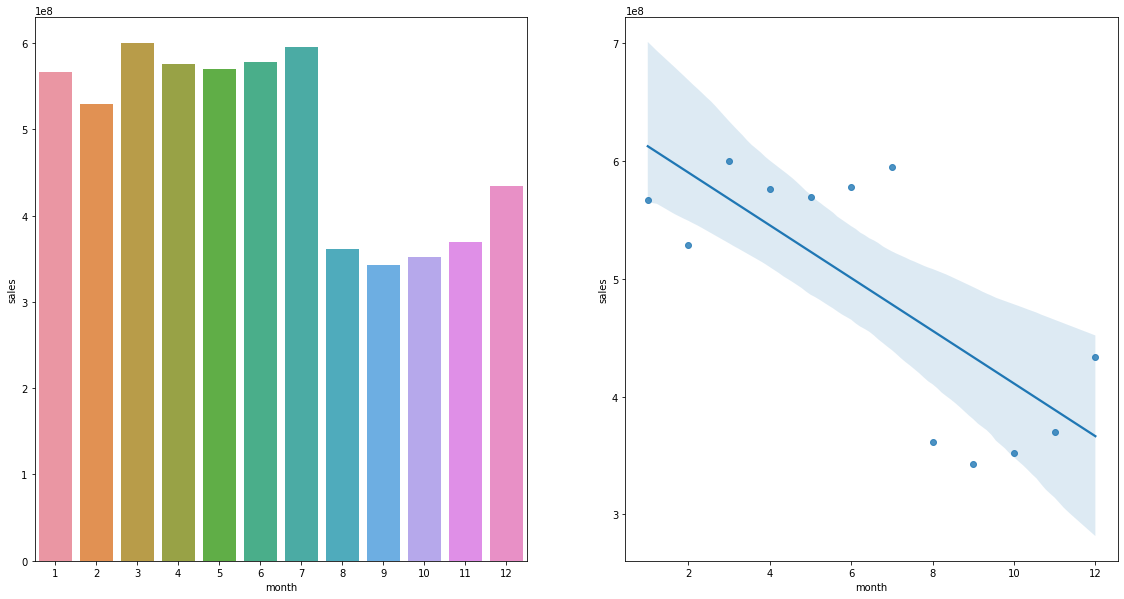

In [303]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).sum().reset_index()
plt.figure(figsize=(30, 10))
plt.subplot( 1, 3, 1 )
sns.barplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='month', y='sales', data=aux1 );

# ELAS VENDEM MENOS NO SEGUNDO SEMESTRE DO ANO

#### H11. Lojas deveriam vender mais depois do dia 10 de cada mês.

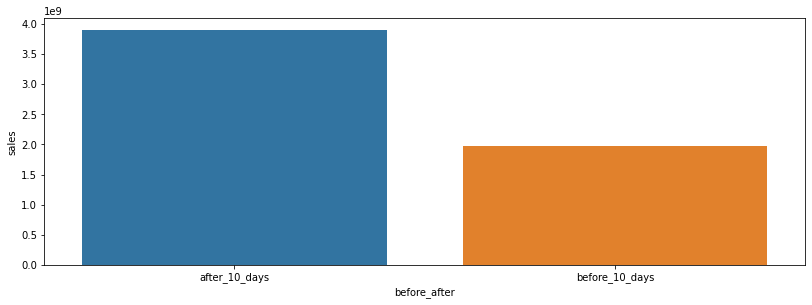

In [313]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()
plt.figure(figsize=(30, 10))
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()
plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='sales', data=aux2 );


# SIM, ELAS VENDEM MAIS APÓS O DIA 10

#### H12. Lojas deveriam vender menos aos finais de semana.

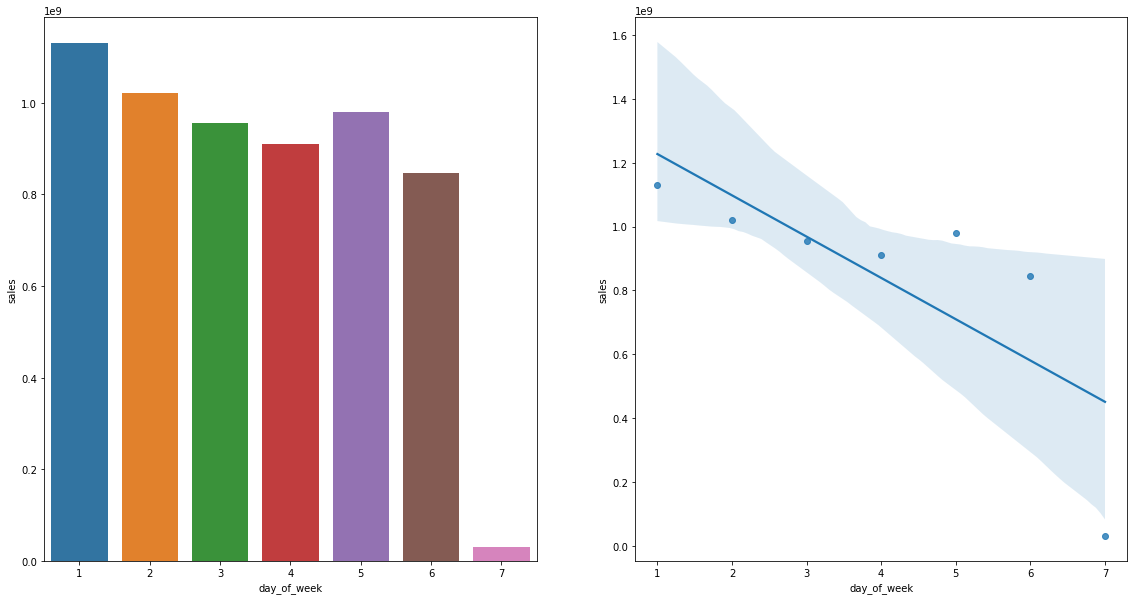

In [317]:
aux1 = df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).sum().reset_index()
plt.figure(figsize=(30, 10))    
plt.subplot( 1, 3, 1 )
sns.barplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 );

# VERDADEIRO

#### H13. Lojas deveriam vender menos durante os feriados escolares.

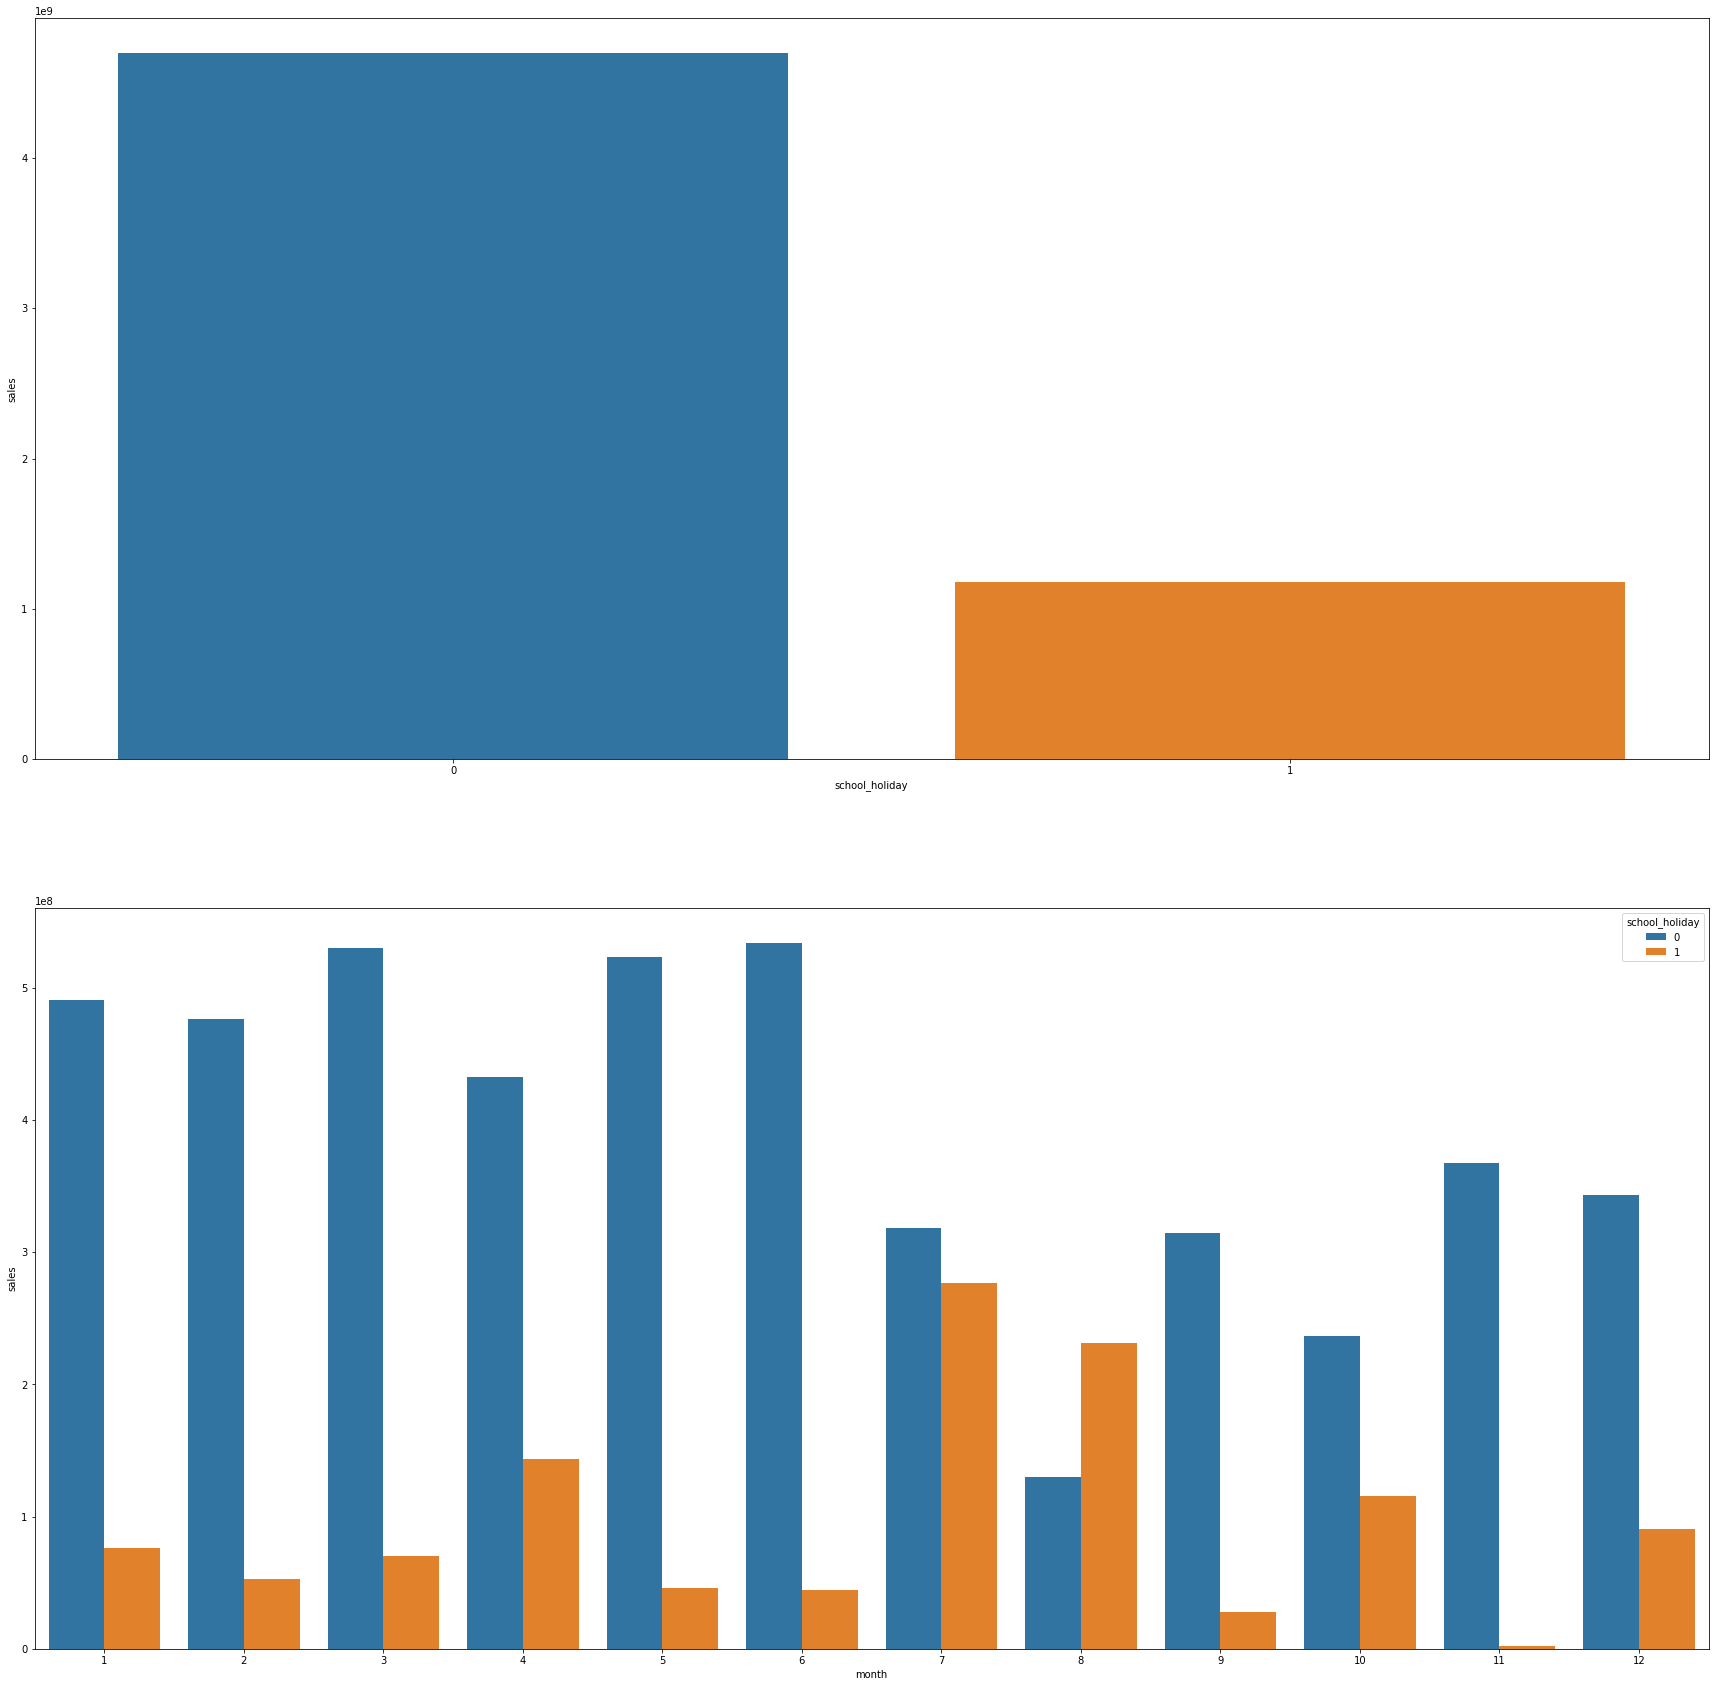

In [321]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).sum().reset_index()

# dados de 0 e 1. 0 não é feriado e 1 é feriado
plt.figure(figsize=(30, 30)) 
plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 );

# Vendo por mês se em algum mês, a venda de feriados bateu com a venda normal
aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month','school_holiday'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )

sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 );

# VERDADEIRO

### 4.3 Análise Multivariada